## Because this week use the same dataset as last week, i am going to re-use the pre-processed dataset that i had done. Visualization will also be the same thing from last week

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
current_path = os.getcwd()
print("The current working directory is:", current_path)

The current working directory is: /content


In [4]:
df = pd.read_csv('/content/drive/MyDrive/processed_titanic.csv')

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

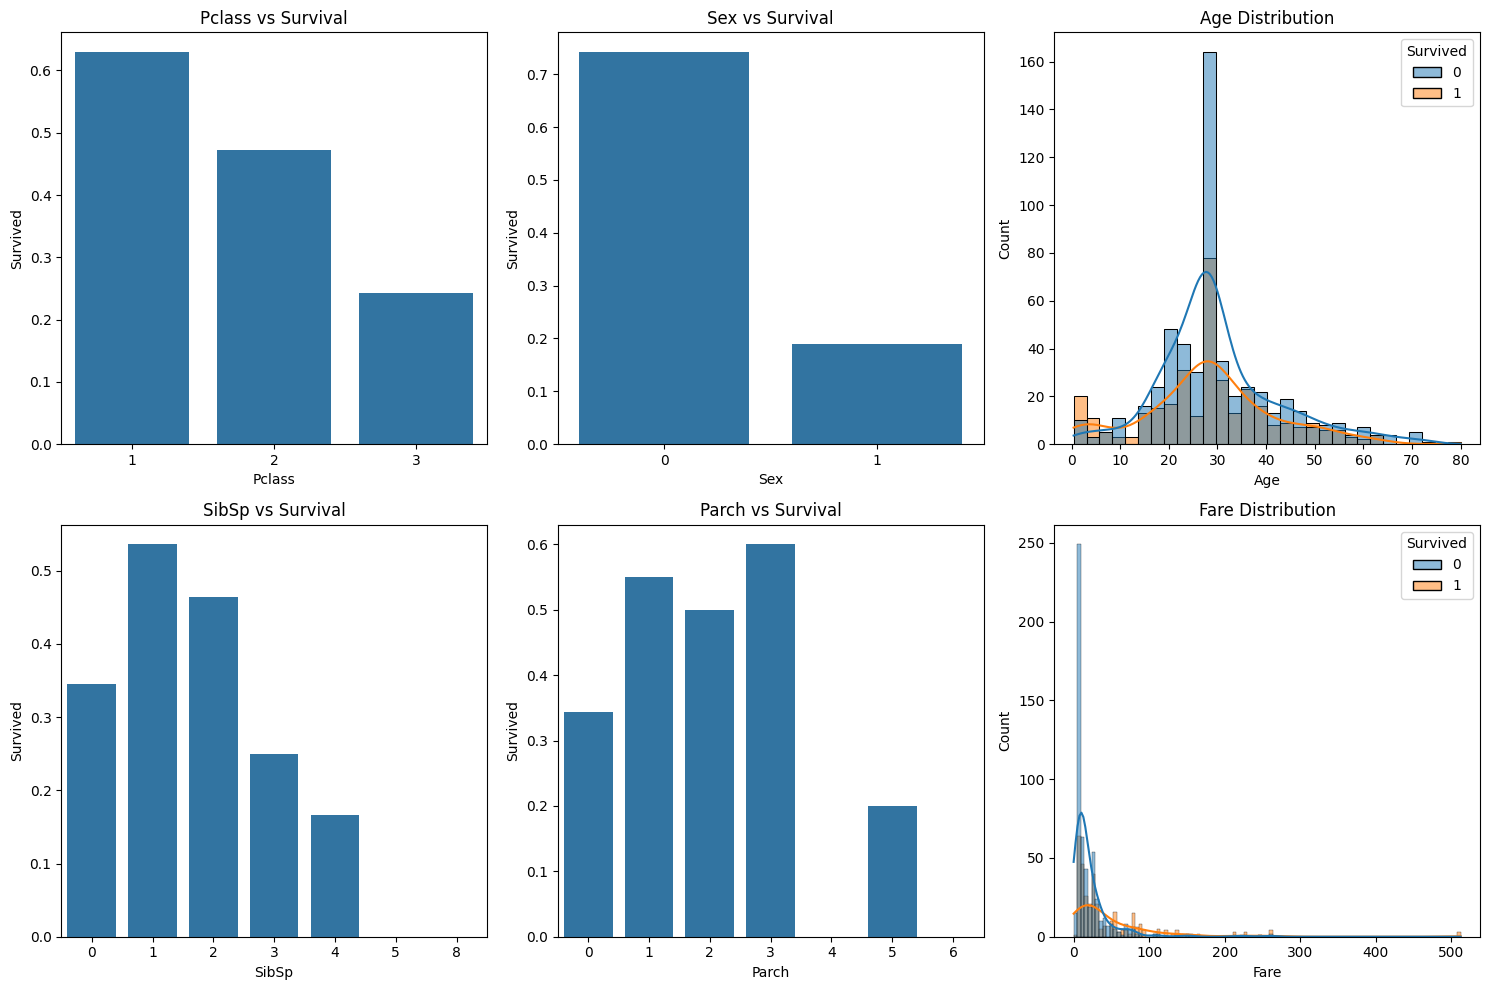

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.barplot(x='Pclass', y='Survived', errorbar=None, data=df)
plt.title('Pclass vs Survival')

plt.subplot(2, 3, 2)
sns.barplot(x='Sex', y='Survived', errorbar=None, data=df)
plt.title('Sex vs Survival')

plt.subplot(2, 3, 3)
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution')

plt.subplot(2, 3, 4)
sns.barplot(x='SibSp', y='Survived', errorbar=None, data=df)
plt.title('SibSp vs Survival')

plt.subplot(2, 3, 5)
sns.barplot(x='Parch', y='Survived', errorbar=None, data=df)
plt.title('Parch vs Survival')

plt.subplot(2, 3, 6)
sns.histplot(data=df, x='Fare', hue='Survived', kde=True)
plt.title('Fare Distribution')

plt.tight_layout()
plt.show()

In [7]:
feature = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
label = df['Survived']

In [8]:
train_feature, test_feature, train_label, test_label = train_test_split(feature, label, test_size=0.2)

In [9]:
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_feature)
scaled_test_features = scaler.transform(test_feature)

In [10]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10, gamma='auto')
model.fit(scaled_train_features, train_label)

SVC(C=10, gamma='auto')

In [11]:
predicted_test_labels = model.predict(scaled_test_features)

print("\nPredictions for the Test Dataset:")
for index, prediction in enumerate(predicted_test_labels):
    survival_status = 'survived' if prediction == 1 else 'not survived'
    print(f"Passenger {index + 1}: {survival_status}")


Predictions for the Test Dataset:
Passenger 1: not survived
Passenger 2: survived
Passenger 3: survived
Passenger 4: survived
Passenger 5: not survived
Passenger 6: not survived
Passenger 7: survived
Passenger 8: not survived
Passenger 9: survived
Passenger 10: not survived
Passenger 11: not survived
Passenger 12: not survived
Passenger 13: not survived
Passenger 14: not survived
Passenger 15: survived
Passenger 16: not survived
Passenger 17: survived
Passenger 18: survived
Passenger 19: survived
Passenger 20: survived
Passenger 21: not survived
Passenger 22: not survived
Passenger 23: not survived
Passenger 24: not survived
Passenger 25: not survived
Passenger 26: survived
Passenger 27: not survived
Passenger 28: not survived
Passenger 29: survived
Passenger 30: survived
Passenger 31: not survived
Passenger 32: survived
Passenger 33: not survived
Passenger 34: not survived
Passenger 35: not survived
Passenger 36: not survived
Passenger 37: not survived
Passenger 38: not survived
Pass

In [12]:
test_accuracy = model.score(scaled_test_features, test_label)
print(f"Test accuracy: {test_accuracy:.2%}")

Test accuracy: 84.92%
